In [2]:
import os
import dask_image.imread
import dask_image.ndfilters
import dask.array as da
import dask_image.ndmeasure
from dask.distributed import LocalCluster, Client
import dask.dataframe as dd
from dask import *
import imageio
import numpy as np

def readImg(path):
    img = imageio.imread(path)
    im = np.array(img,dtype='uint8')
    return im

def writeImg(path,buf):
    imageio.imwrite(path,buf)
    


In [3]:
cluster = LocalCluster()
client = Client(cluster)

distributed.diskutils - INFO - Found stale lock file and directory '/mnt/c/Users/aympa/source/repos/git_sophia/BigDataHadoopSparkDaskCourse/TPs/Project/Project/Dask/dask-worker-space/worker-2jiqjhpw', purging
distributed.diskutils - INFO - Found stale lock file and directory '/mnt/c/Users/aympa/source/repos/git_sophia/BigDataHadoopSparkDaskCourse/TPs/Project/Project/Dask/dask-worker-space/worker-biz3f6wj', purging
distributed.diskutils - INFO - Found stale lock file and directory '/mnt/c/Users/aympa/source/repos/git_sophia/BigDataHadoopSparkDaskCourse/TPs/Project/Project/Dask/dask-worker-space/worker-bt0ihmhk', purging
distributed.diskutils - INFO - Found stale lock file and directory '/mnt/c/Users/aympa/source/repos/git_sophia/BigDataHadoopSparkDaskCourse/TPs/Project/Project/Dask/dask-worker-space/worker-dwj9pibk', purging
distributed.diskutils - INFO - Found stale lock file and directory '/mnt/c/Users/aympa/source/repos/git_sophia/BigDataHadoopSparkDaskCourse/TPs/Project/Project/Dask

In [7]:

# data_dir = '/home/aympab/repos/BigDataHadoopSparkDaskCourse/TPs/Project'
data_dir = ''
file = os.path.join(data_dir,'lena_noisy.jpg')
# print("FILE:",file)
img_buf=readImg(file)
print('SHAPE',img_buf.shape)
# print('IMG\n',img_buf)
nx=img_buf.shape[0]
ny=img_buf.shape[1]

###########################################################################
#
# SPLT IMAGES IN NB_PARTITIONS PARTS
nb_partitions = 8
print("NB PARTITIONS : ",nb_partitions)
data=[]
begin=0
block_size=nx/nb_partitions
for ip in range(nb_partitions):
    end=min(begin+block_size,nx)
    data.append([ip,begin,end,img_buf])
    
    #Saving the files so dask can use it
    writeImg('part'+str(ip)+'.jpg', img_buf[int(begin):int(end),:,:])
    begin=end


#Dask reads the tiled_pic
filename_pattern = os.path.join('', 'part*.jpg')
tiled_pic = dask_image.imread.imread(filename_pattern)

#Array of result so each chunk does the median filter 
res = []
for i in range(nb_partitions):
    res.append(dask_image.ndfilters.median_filter(tiled_pic[i,...], size=3))
    
#concatenate the result
data = [res[i] for i in range(nb_partitions)]
combined_image = da.concatenate(data, )



SHAPE (128, 128, 3)
NB PARTITIONS :  8


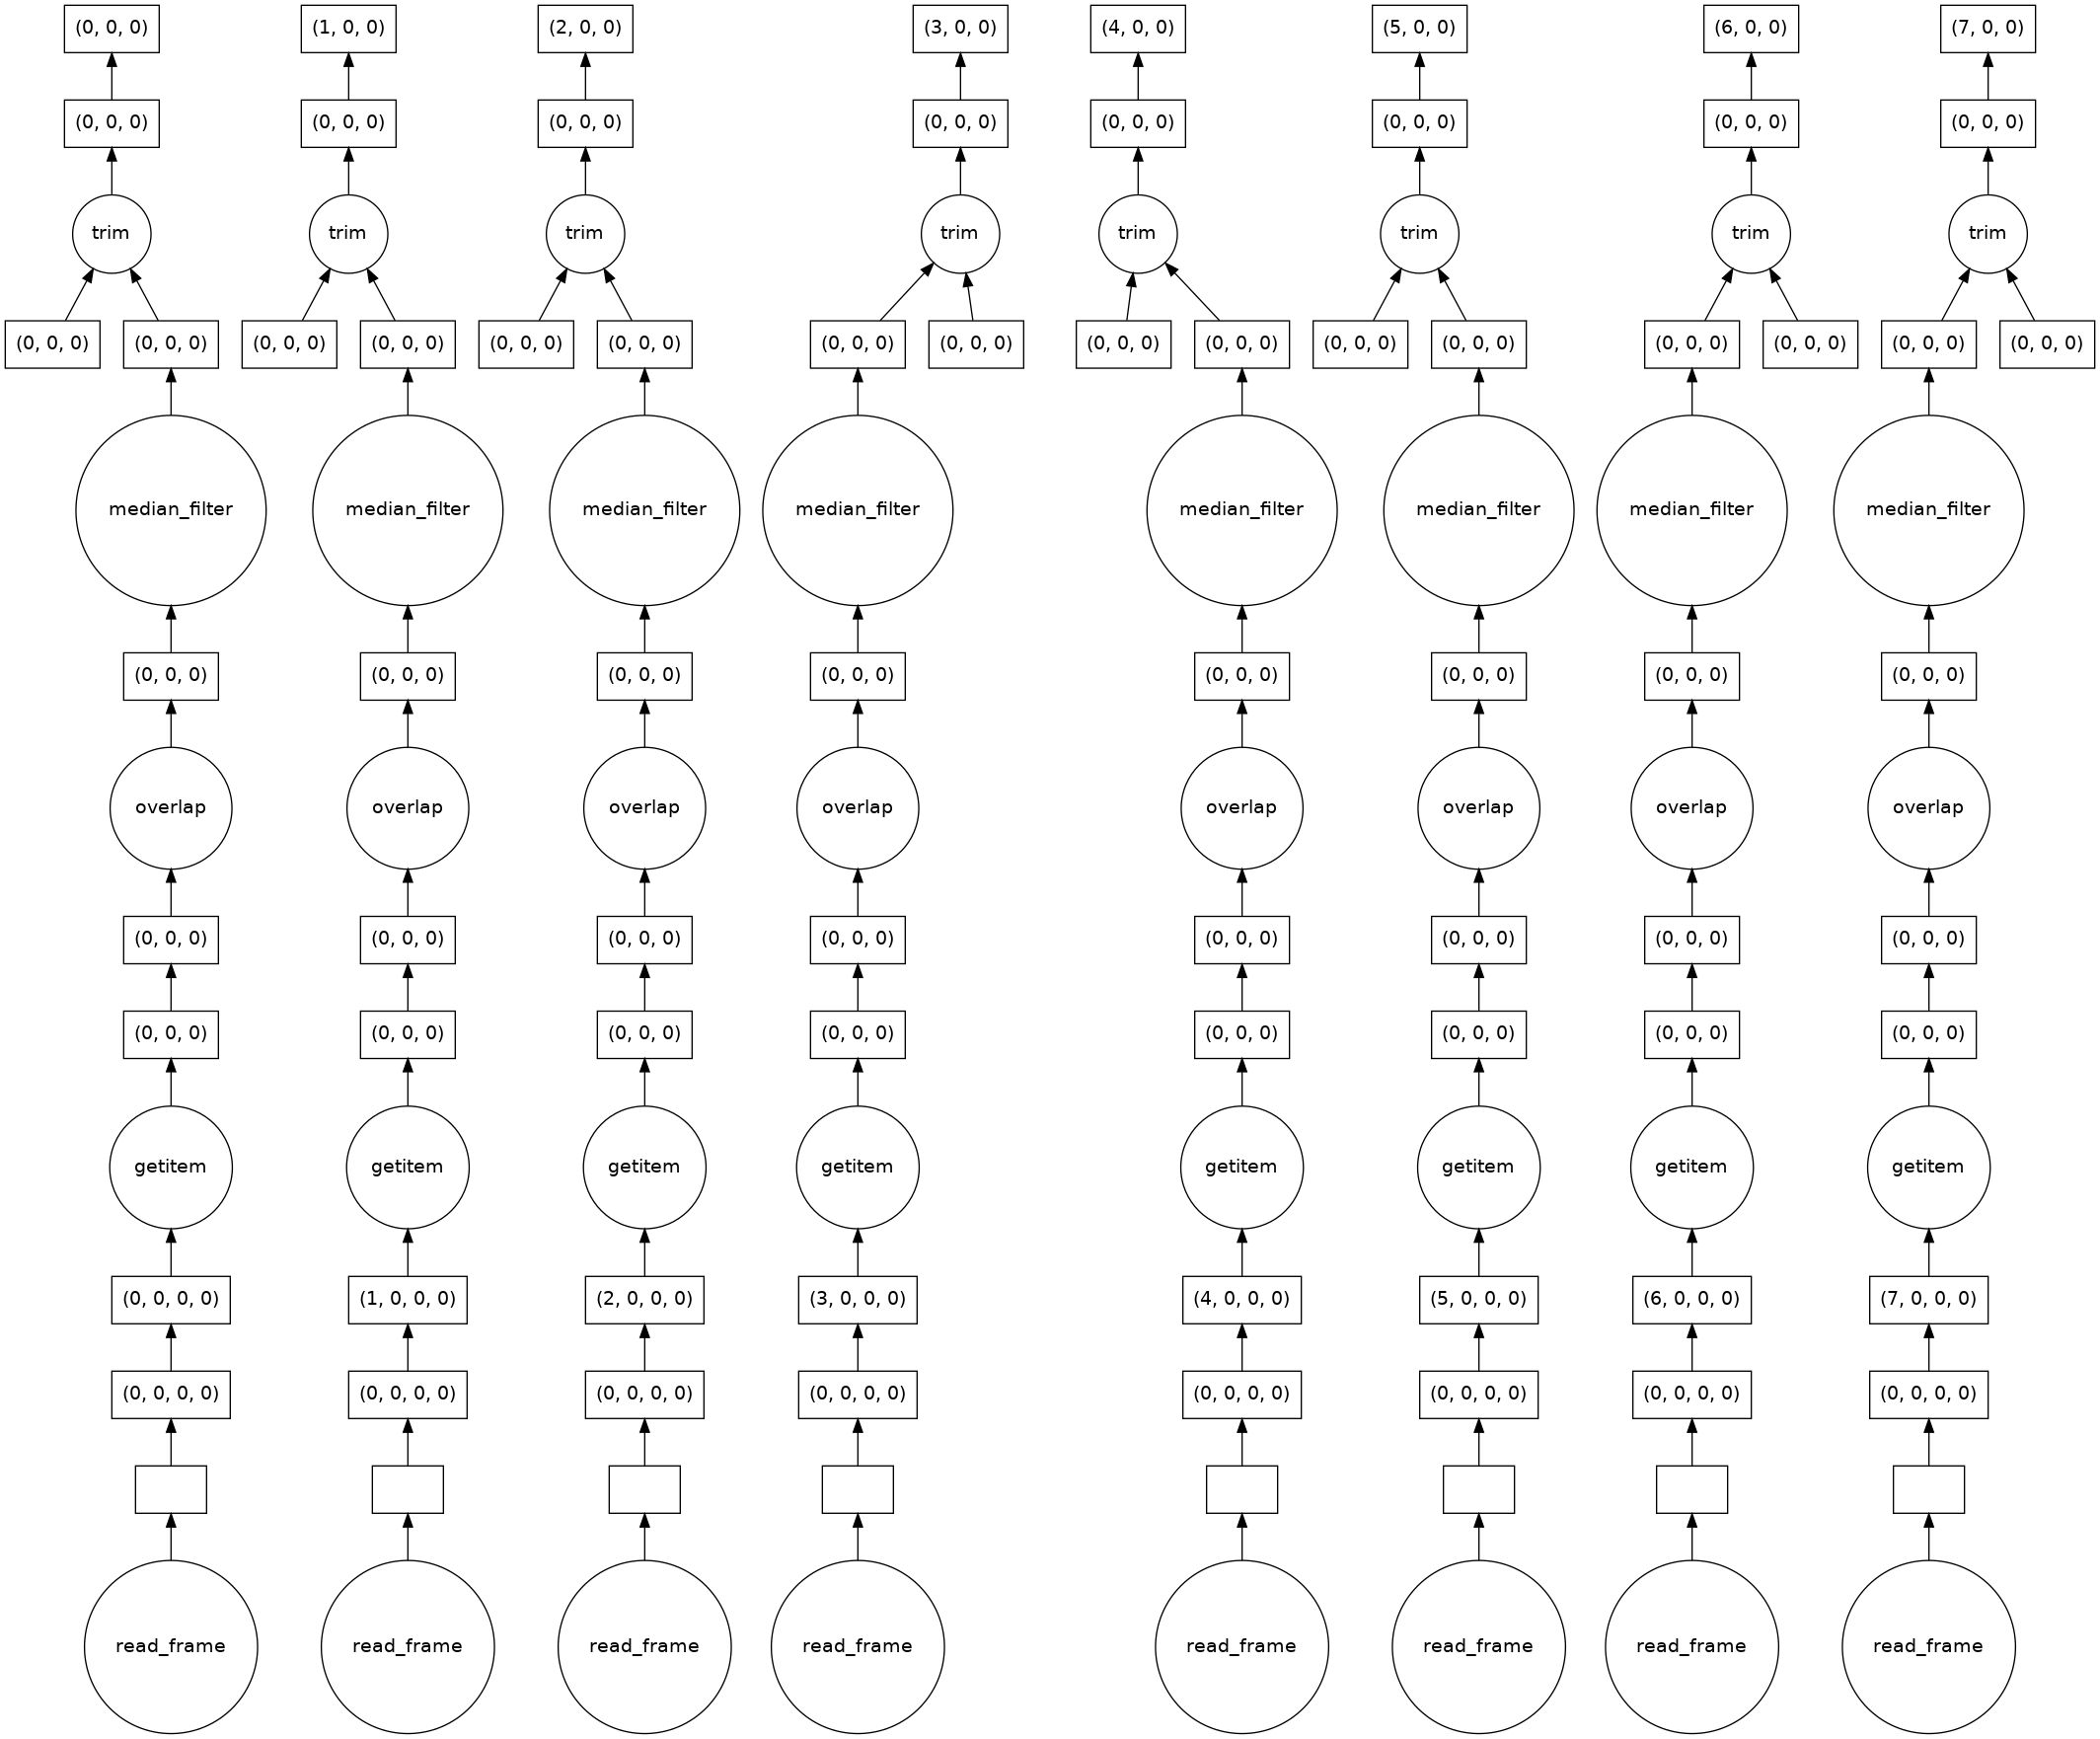

In [12]:
for r in res :
    r.visualize()
    
combined_image.visualize()

In [5]:
#write the file and close client
writeImg('lena_filtered_dask.jpg', combined_image)

In [6]:
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
